## IMDB数据集

### 加载IMDB数据集

In [1]:
from keras.datasets import imdb

#加载数据，参数10000代表仅保留前10000个最常出现的单词，舍弃低频单词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#查看数据

#train_data和test_data是由评论组成的列表
print('shape:',train_data.shape)
#每条评论又是单词索引的列表，代表一系列单词
print('first data:',train_data[0])

#train_labels和test_labels是0和1组成的列表，0代表负面，1代表正面
print('first label:',train_labels[0])

shape: (25000,)
first data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
first label: 1


In [3]:
#由于限定为前10000个常见单词，单词索引都不会超过10000
max([max(sequence) for sequence in train_data])

9999

In [4]:
#以下代码将索引解码为英文单词
word_index = imdb.get_word_index()   #word_index是一个将单词映射为整数索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])     #键值转换，将整数索引映射为单词
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])    #将评论解码。索引减去3，因为0、1、2是保留索引，不存储单词索引
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 准备数据

### 将整数序列编码为二进制矩阵

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    #创建一个形状为(len(sequences), dimension)的零矩阵
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1    #将results[i]的指定索引设为1
    return results

#将数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
#现在的样本
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
#再将标签向量化，便于输入到神经网络
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 构建网络

### 模型定义

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


### 编译模型，使用自定义的损失和指标

In [9]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 验证方法

为了在训练过程中监控模型在前所未见的数据上的精度，需要将原始训练数据留出10000个样本作为验证集

### 留出验证集

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 训练模型

In [11]:
#使用512个样本组成的小批量，训练20个轮次，将验证集通过validation_data传入
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
 3072/15000 [=====>........................] - ETA: 2:52 - loss: 0.6514 - binary_accuracy: 0.6523

/home/cqc/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.679663). Check your callbacks.
  % delta_t_median)


15000/15000 [==============================] - 46s 3ms/step - loss: 0.4976 - binary_accuracy: 0.7953 - val_loss: 0.3717 - val_binary_accuracy: 0.8721
Epoch 2/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2957 - binary_accuracy: 0.9045 - val_loss: 0.2990 - val_binary_accuracy: 0.8909
Epoch 3/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.2160 - binary_accuracy: 0.9285 - val_loss: 0.3088 - val_binary_accuracy: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1742 - binary_accuracy: 0.9433 - val_loss: 0.2831 - val_binary_accuracy: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1415 - binary_accuracy: 0.9542 - val_loss: 0.2863 - val_binary_accuracy: 0.8851
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1143 - binary_accuracy: 0.9653 - val_loss: 0.3085 - val_binary_accuracy: 0.8812
Epoch 7/20
15000/15000 [================

In [12]:
#model.fit()返回了一个History对象，这个对象有一个成员history，他是一个字典，包含训练过程中的所有数据。
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

### 绘制训练损失和验证损失

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

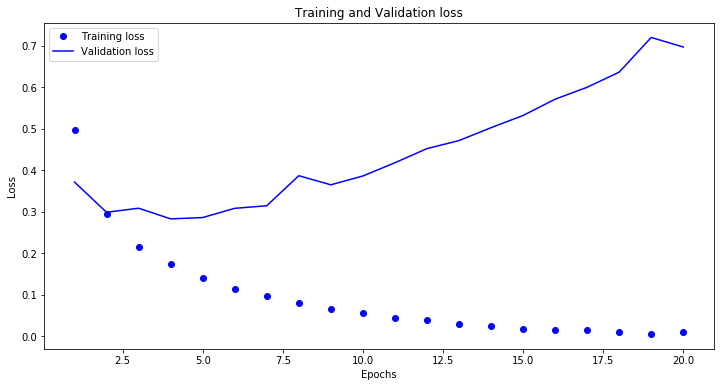

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()    #绘制图例

plt.show()

<Figure size 432x288 with 0 Axes>

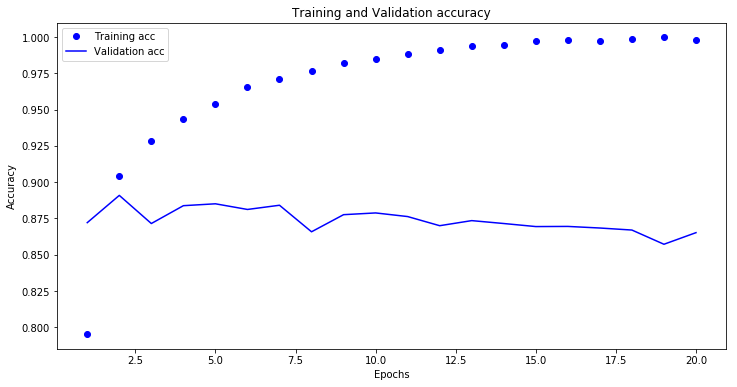

In [15]:
plt.clf()    #清空图像

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.figure(figsize=(12, 6))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

可见，训练数据随着迭代次数增加，精确度上升，损失降低；相反，在模型未见的验证集上代价不断上升，精确度在第4～6步后达到最高并趋于平稳。

为了防止过拟合，可提前结束训练，考虑在4～6步停止。

### 重新训练一个模型

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=6,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/6
25000/25000 [==============================] - 32s 1ms/step - loss: 0.4529 - acc: 0.8240
Epoch 2/6
25000/25000 [==============================] - 2s 99us/step - loss: 0.2567 - acc: 0.9097
Epoch 3/6
25000/25000 [==============================] - 2s 74us/step - loss: 0.1980 - acc: 0.9299
Epoch 4/6
25000/25000 [==============================] - 2s 75us/step - loss: 0.1662 - acc: 0.9407
Epoch 5/6
25000/25000 [==============================] - 2s 73us/step - loss: 0.1442 - acc: 0.9491
Epoch 6/6
25000/25000 [==============================] - 2s 91us/step


In [17]:
print('Test loss: {}, Test acc: {}'.format(results[0], results[1]))

Test loss: 0.3392536395215988, Test acc: 0.8746


## 使用训练好的网络在新数据上生成预测结果

训练好网络之后，你希望将其用于实践。你可以用predict 方法来得到评论为正面的可能性大小。

In [18]:
model.predict(x_test)

array([[0.17532122],
       [0.9999676 ],
       [0.6022942 ],
       ...,
       [0.14010793],
       [0.06079173],
       [0.8192103 ]], dtype=float32)

网络对某些样本的结果非常确信（大于等于0.99，或小于等于0.01），但对其他结果却不那么确信（0.6或0.4）